**Author:** Regina Hoo

**Institution:** Wellcome Sanger institute

**April, 2023**

---

##  Parasites pS1_preprocessing 28/11/2022 update
GRCh38 2020-A + Pf genome

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import seaborn as sb
from glob import iglob
import anndata
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle 
import scrublet as scr

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

def Barplot(which_var, adata, var='leiden', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', dpi=100, orientation='landscape', format= 'pdf')
    
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/EXP/preprocessing/'
#sc.settings.figdir = './figures/TWO/preprocessing/'
#sc.settings.figdir = './figures/TW-Okae/preprocessing/'
#sc.settings.figdir = './figures/AO-Okae/preprocessing/'

sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1


'/opt/conda/bin/python'

## Import meta data

In [2]:
data_dir = '/nfs/team292/rh26/09_2D9parasite_stars/'

In [3]:
#meta = pd.read_csv(data_dir+'./metadata/meta_ao_okae_infection_2d9_sc.csv',index_col=0)
#meta = pd.read_csv(data_dir+'./metadata/meta_tw_okae_infection_2d9_sc.csv',index_col=0)
meta = pd.read_csv(data_dir+'/metadata/meta_exp_infection_2d9_sc.csv', index_col=0)
#meta = pd.read_csv(data_dir+'/metadata/meta_twO_infection_2d9_sc.csv',index_col=0)
meta['stage'] = meta['stage'].astype('str')
plotmeta = list(meta.columns)
plotmeta.append('sample')
print('Number of samples: ', meta.index.size)

Number of samples:  12


In [4]:
meta

stage             id proc          sample.1  \
sample                                                                  
Pla_HDBR11345021         PfNF54      parasite    iv  Pla_HDBR11345021   
Pla_HDBR11345022      PfNF54_nb    parasite_nb  exp  Pla_HDBR11345022   
Pla_HDBR11345023  PfNF54+Hrv107  parasite+host  exp  Pla_HDBR11345023   
Pla_HDBR11345024         PfNF54      parasite    iv  Pla_HDBR11345024   
Pla_HDBR11345025      PfNF54_nb    parasite_nb  exp  Pla_HDBR11345025   
Pla_HDBR11345026  PfNF54+Hrv124  parasite+host  exp  Pla_HDBR11345026   
Pla_HDBR12966649         PfNF54      parasite    iv  Pla_HDBR12966649   
Pla_HDBR12966650      PfNF54_nb    parasite_nb  exp  Pla_HDBR12966650   
Pla_HDBR12966651  PfNF54+Hrv168  parasite+host  exp  Pla_HDBR12966651   
Pla_HDBR13007971         PfNF54      parasite    iv  Pla_HDBR13007971   
Pla_HDBR13007972      PfNF54_nb    parasite_nb  exp  Pla_HDBR13007972   
Pla_HDBR13007973  PfNF54+Hrv170  parasite+host  exp  Pla_HDBR13007973   

                   p_batch  
sample                      
Pla_HDBR11345021  p_batch1  
Pla_HDBR11345022  p_batch1  
Pla_HDBR11345023  p_batch1  
Pla_HDBR11345024  p_batch2  
Pla_HDBR11345025  p_batch2  
Pla_HDBR11345026  p_batch2  
Pla_HDBR12966649  p_batch6  
Pla_HDBR12966650  p_batch6  
Pla_HDBR12966651  p_batch6  
Pla_HDBR13007971  p_batch7  
Pla_HDBR13007972  p_batch7  
Pla_HDBR13007973  p_batch7

## Load GeneFull/filtered STARsolo outputs
### Preprocessing and merge matrix

Note: for parasites, skip basic filtering. Do filetering at later step.

In [5]:
holder = []
for sample in meta.index:
    print(sample)
    holder.append(sc.read_10x_mtx(data_dir+sample+'/output/GeneFull/filtered/',var_names='gene_symbols',cache=True)) 
    #holder.append(sc.read_10x_h5(data_dir+sample+'/cellbender.out/cellbender_out_filtered.h5'))
    #holder.append(sc.read_10x_h5(data_dir+sample+'/filtered_feature_bc_matrix.h5'))
    #holder.append(sc.read_10x_mtx(data_dir+sample+'/filtered_feature_bc_matrix/')) 
    # Set names of observation as sample + _ + barcode/probe
    holder[-1].var_names_make_unique()
    holder[-1].obs_names = [sample+'_'+i.split('-')[0] for i in holder[-1].obs_names]
    #Filer cells with less than 100 genes expressed
    # sc.pp.filter_cells(holder[-1], min_genes=100)
    #Filer genes expressed in less than 3 cells
    # sc.pp.filter_genes(holder[-1], min_cells=10)
    # add in metadata
    holder[-1].obs['sample'] = sample 
    for val in meta.columns:
        holder[-1].obs[val] = meta[val][sample]
    # Extract mitochondial genes
    mito_genes = [name for name in holder[-1].var_names if name.startswith('MT')]
    #for each cell compute fraction of counts in mito genes vs. all genes
    #the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
    holder[-1].obs['percent_mito'] = np.sum(
        holder[-1][:, mito_genes].X, axis=1).A1 / np.sum(holder[-1].X, axis=1).A1
    #add the total counts per cell as observations-annotation to adata
    holder[-1].obs['n_counts'] = holder[-1].X.sum(axis=1).A1
    holder[-1].obs['n_genes'] = holder[-1].X.sum(axis=1).A1
    print('Total number of cells: {:d}'.format(holder[-1].n_obs))
    print('Total number of genes: {:d}'.format(holder[-1].n_vars))

Pla_HDBR11345021
Total number of cells: 23920
Total number of genes: 42294
Pla_HDBR11345022
Total number of cells: 24765
Total number of genes: 42294
Pla_HDBR11345023
Total number of cells: 19984
Total number of genes: 42294
Pla_HDBR11345024
Total number of cells: 22689
Total number of genes: 42294
Pla_HDBR11345025
Total number of cells: 36113
Total number of genes: 42294
Pla_HDBR11345026
Total number of cells: 20974
Total number of genes: 42294
Pla_HDBR12966649
Total number of cells: 50764
Total number of genes: 42294
Pla_HDBR12966650
Total number of cells: 42302
Total number of genes: 42294
Pla_HDBR12966651
Total number of cells: 15133
Total number of genes: 42294
Pla_HDBR13007971
Total number of cells: 34513
Total number of genes: 42294
Pla_HDBR13007972
Total number of cells: 36133
Total number of genes: 42294
Pla_HDBR13007973
Total number of cells: 20658
Total number of genes: 42294


In [6]:
# confirm N samples
print(len(holder))
# merge datasets by taking the intersection of cells found between nucleis and cells 
adata = holder[0].concatenate(holder[1:],join='outer',index_unique=None)#batch_key='sample')
# copy of this matrix in Compressed Sparse Row format
adata.X = adata.X.tocsr()
adata

12


AnnData object with n_obs × n_vars = 347948 × 42294
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch'
    var: 'gene_ids', 'feature_types'

In [7]:
# basic filterings
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=10)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [8]:
# check combined ref
adata.var

gene_ids    feature_types  n_cells
AL627309.1     ENSG00000238009  Gene Expression      234
AL627309.5     ENSG00000241860  Gene Expression      294
AP006222.2     ENSG00000286448  Gene Expression       87
AL732372.1     ENSG00000236601  Gene Expression       18
AC114498.1     ENSG00000235146  Gene Expression      126
...                        ...              ...      ...
RIF-180          PF3D7_0115300  Gene Expression       25
PF3D7_0115400    PF3D7_0115400  Gene Expression      130
PF3D7_0115500    PF3D7_0115500  Gene Expression       57
RIF-181          PF3D7_0115600  Gene Expression    10210
VAR-79           PF3D7_0115700  Gene Expression     6837

[33231 rows x 3 columns]

In [9]:
pf= adata.var.gene_ids.str.startswith('PF3D7')
print(sum(pf))

5515


In [10]:
hum= adata.var.gene_ids.str.startswith('ENSG')
print(sum(hum))

27716


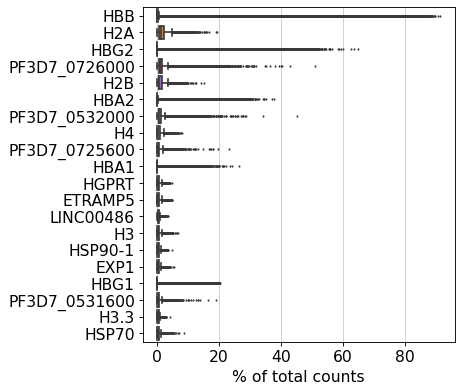

In [11]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [12]:
adata.var['hum'] = adata.var.gene_ids.str.startswith('ENSG') ## all human genes
adata.var['pf'] = adata.var.gene_ids.str.startswith('PF3D7') ## all malaria genes

sc.pp.calculate_qc_metrics(adata, qc_vars=['hum'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['pf'], percent_top=None, log1p=False, inplace=True)

In [13]:
adata.obs.tail()

sample          stage  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  Pla_HDBR13007973  PfNF54+Hrv170   

                                              id proc          sample.1  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  parasite+host  exp  Pla_HDBR13007973   

                                    p_batch  percent_mito  n_counts  n_genes  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  p_batch7      0.021978    2912.0     1682   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  p_batch7      0.037967    3424.0     1767   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  p_batch7      0.039859    3688.0     1994   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  p_batch7      0.071372    2536.0     1656   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  p_batch7      0.036182    3206.0     1852   

                                  batch  n_genes_by_counts  total_counts  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG    11               1681        2911.0   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT    11               1766        3423.0   
Pla_HDBR13007973_TTTGTTGTCGCCAACG    11               1994        3688.0   
Pla_HDBR13007973_TTTGTTGTCTAGTACG    11               1656        2536.0   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA    11               1852        3206.0   

                                   total_counts_hum  pct_counts_hum  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG             580.0       19.924425   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT             979.0       28.600641   
Pla_HDBR13007973_TTTGTTGTCGCCAACG             966.0       26.193058   
Pla_HDBR13007973_TTTGTTGTCTAGTACG            1256.0       49.526814   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA             958.0       29.881472   

                                   total_counts_pf  pct_counts_pf  
Pla_HDBR13007973_TTTGTTGGTTTCGATG           2331.0      80.075577  
Pla_HDBR13007973_TTTGTTGTCCAGCTCT           2444.0      71.399353  
Pla_HDBR13007973_TTTGTTGTCGCCAACG           2722.0      73.806938  
Pla_HDBR13007973_TTTGTTGTCTAGTACG           1280.0      50.473183  
Pla_HDBR13007973_TTTGTTGTCTCGAGTA           2248.0      70.118530

In [14]:
adata

AnnData object with n_obs × n_vars = 340427 × 33231
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'sample' as categorical
... storing 'stage' as categorical
... storing 'id' as categorical
... storing 'proc' as categorical
... storing 'sample.1' as categorical
... storing 'p_batch' as categorical
... storing 'feature_types' as categorical


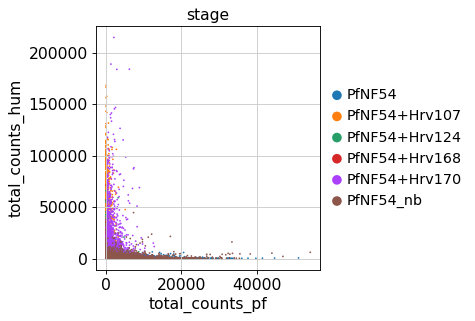

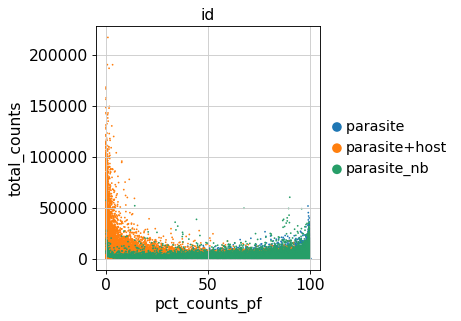

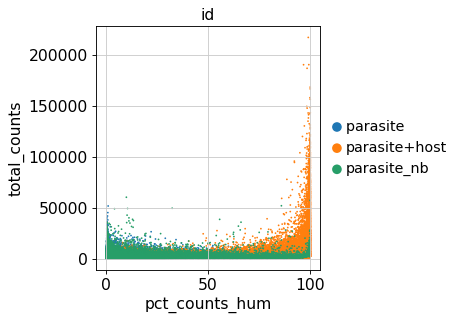

In [15]:
sc.pl.scatter(adata, x='total_counts_pf', y='total_counts_hum', color="stage", size=10)
sc.pl.scatter(adata, x='pct_counts_pf', y='total_counts', color="id", size=10)
sc.pl.scatter(adata, x='pct_counts_hum', y='total_counts', color="id", size=10) 

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


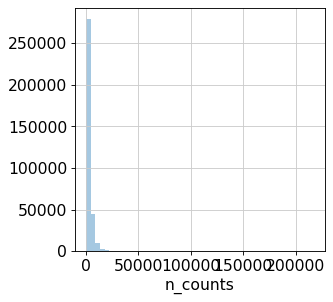

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


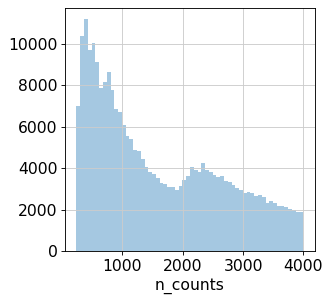

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


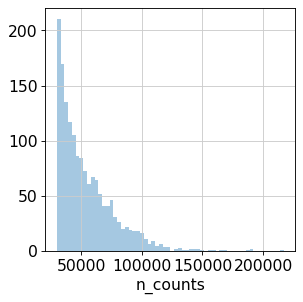

In [16]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<4000], kde=False, bins=60)
#fig = p4.get_figure()
#fig.savefig("histo_n_counts1.png")
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>30000], kde=False, bins=60)
#fig = p5.get_figure()
#fig.savefig("histo_n_counts2.png")
plt.show()

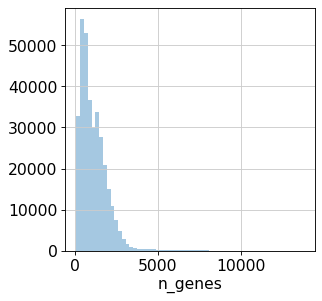

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


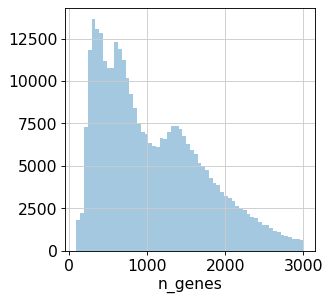

In [17]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
#fig = p6.get_figure()
#fig.savefig("histo_n_genes1.png")
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<3000], kde=False, bins=60)
#fig = p7.get_figure()
#fig.savefig("histo_n_genes2.png")
plt.show()

In [18]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 200)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 50000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 300)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 340427


/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Number of cells after min count filter: 340427
Number of cells after max count filter: 339704
Number of cells after gene filter: 314847


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


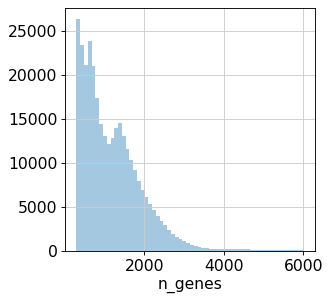

In [19]:
plot_n_genes =sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<6000], kde=False, bins=60)
fig = plot_n_genes.get_figure()
fig.savefig("histo_plot_n_genes.png")
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


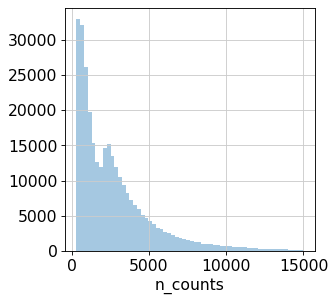

In [20]:
plot_n_counts = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<15000], kde=False, bins=60)
fig = plot_n_counts.get_figure()
fig.savefig("histo_plot_n_counts.png")
plt.show()

In [21]:
sc.pp.filter_genes(adata, min_cells=10)
adata

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 314847 × 32887
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'stage_colors', 'id_colors'

In [22]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['stage'].values.describe()

Total number of cells: 314847
Total number of genes: 32887


counts     freqs
categories                     
PfNF54         112415  0.357046
PfNF54+Hrv107   19437  0.061735
PfNF54+Hrv124   16172  0.051365
PfNF54+Hrv168   15131  0.048058
PfNF54+Hrv170   20492  0.065086
PfNF54_nb      131200  0.416710

In [23]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['proc'].values.describe()

Total number of cells: 314847
Total number of genes: 32887


counts     freqs
categories                  
exp         202432  0.642954
iv          112415  0.357046

In [24]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['sample.1'].values.describe()

Total number of cells: 314847
Total number of genes: 32887


counts     freqs
categories                        
Pla_HDBR11345021   22176  0.070434
Pla_HDBR11345022   22355  0.071003
Pla_HDBR11345023   19437  0.061735
Pla_HDBR11345024   18730  0.059489
Pla_HDBR11345025   34842  0.110663
Pla_HDBR11345026   16172  0.051365
Pla_HDBR12966649   37723  0.119814
Pla_HDBR12966650   37872  0.120287
Pla_HDBR12966651   15131  0.048058
Pla_HDBR13007971   33786  0.107309
Pla_HDBR13007972   36131  0.114757
Pla_HDBR13007973   20492  0.065086

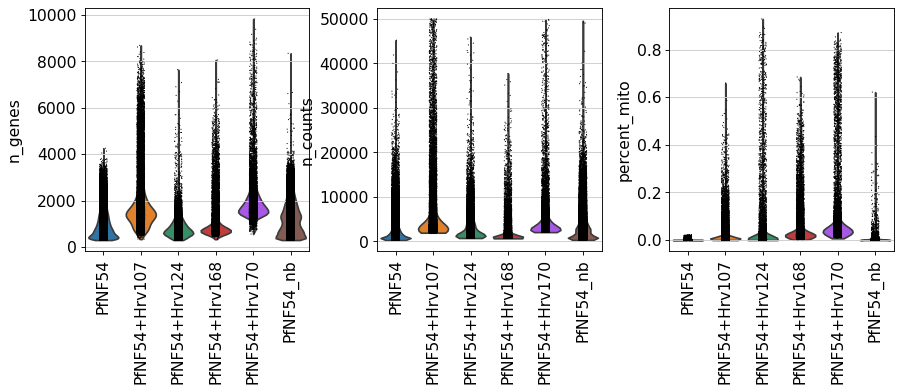

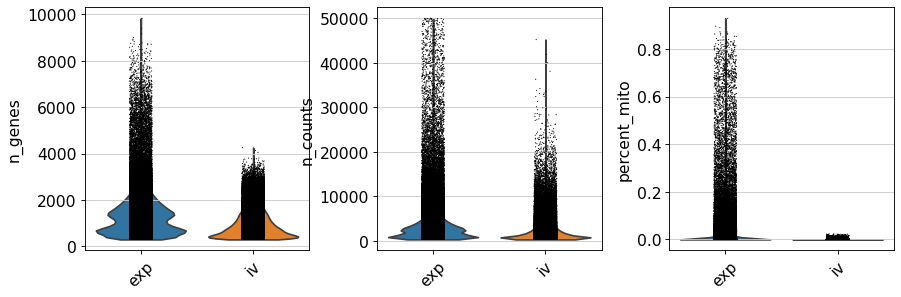

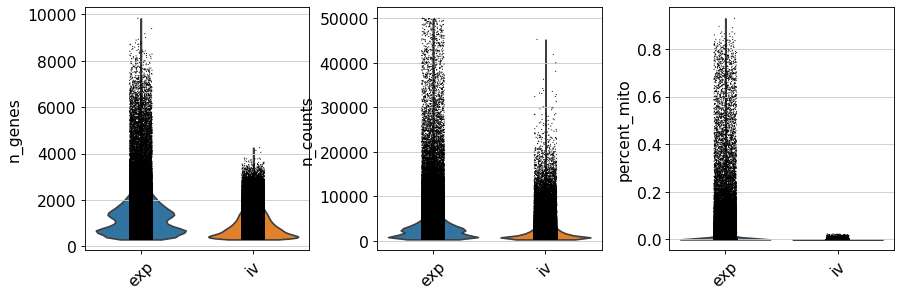

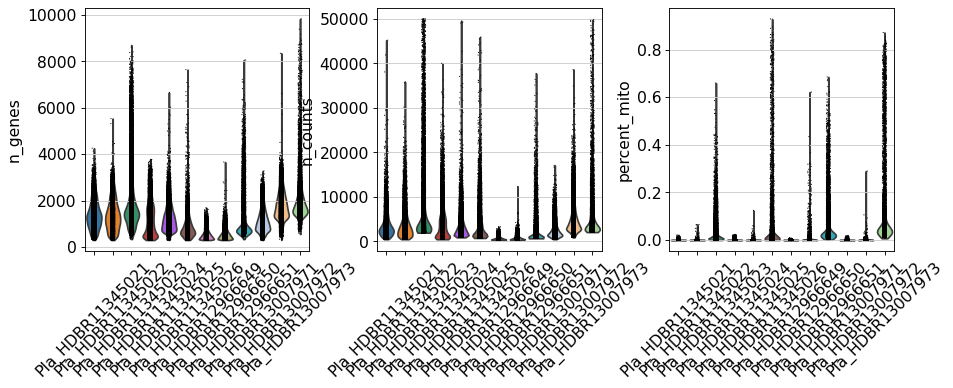

In [25]:
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=90, groupby='stage') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='proc')
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='proc') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='sample.1') 

## Filter cells with large % mitochondrial genes; more applicable to 'host' cells 

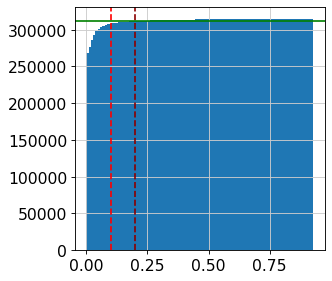

In [26]:
plt.hist(adata.obs['percent_mito'], bins = 100, cumulative=True)
plt.axvline(0.1, linestyle = '--', color = 'red')
plt.axvline(0.2, linestyle = '--', color = 'darkred')
plt.axhline(adata.n_obs*0.99, linestyle = '-', color = 'green')

In [27]:
# >20%
adata = adata[adata.obs['percent_mito'] < 0.2, :]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [28]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['sample.1'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                        
Pla_HDBR11345021   22176  0.071211
Pla_HDBR11345022   22355  0.071785
Pla_HDBR11345023   19107  0.061356
Pla_HDBR11345024   18730  0.060145
Pla_HDBR11345025   34842  0.111883
Pla_HDBR11345026   15485  0.049725
Pla_HDBR12966649   37723  0.121135
Pla_HDBR12966650   37842  0.121517
Pla_HDBR12966651   14151  0.045441
Pla_HDBR13007971   33786  0.108492
Pla_HDBR13007972   36130  0.116019
Pla_HDBR13007973   19087  0.061291

In [29]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['proc'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                  
exp         198999  0.639018
iv          112415  0.360982

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


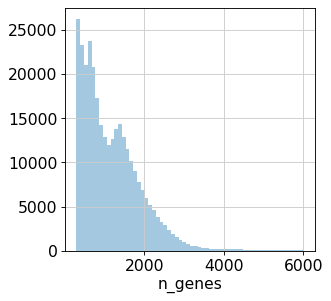

In [30]:
plot_n_genes =sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<6000], kde=False, bins=60)
fig = plot_n_genes.get_figure()
fig.savefig("histo_plot_n_genes.png")
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


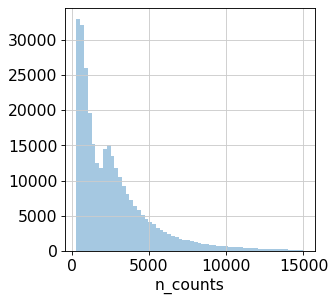

In [31]:
plot_n_counts = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<15000], kde=False, bins=60)
fig = plot_n_counts.get_figure()
fig.savefig("histo_plot_n_counts.png")
plt.show()

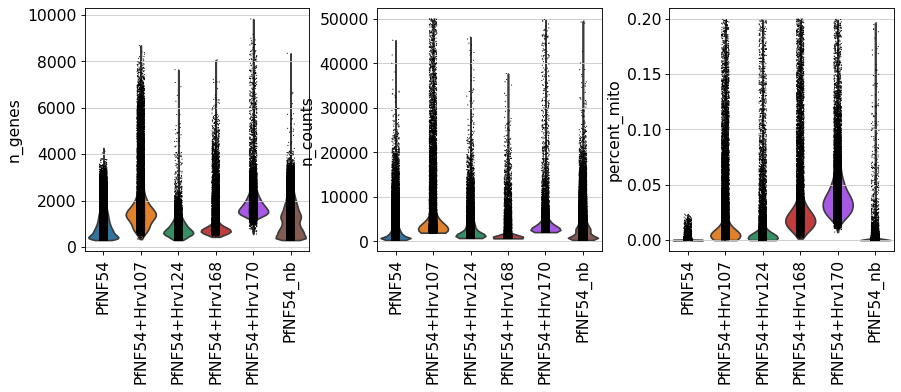

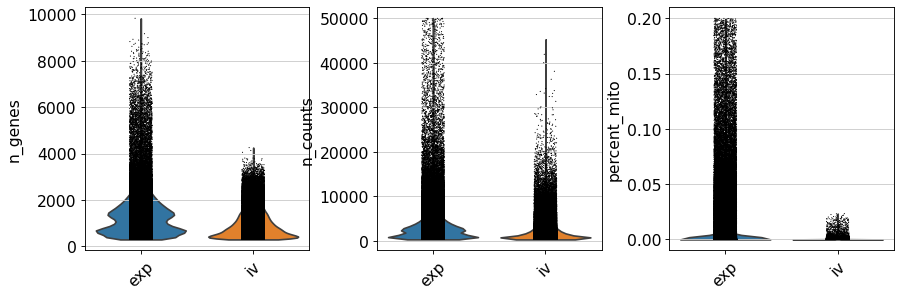

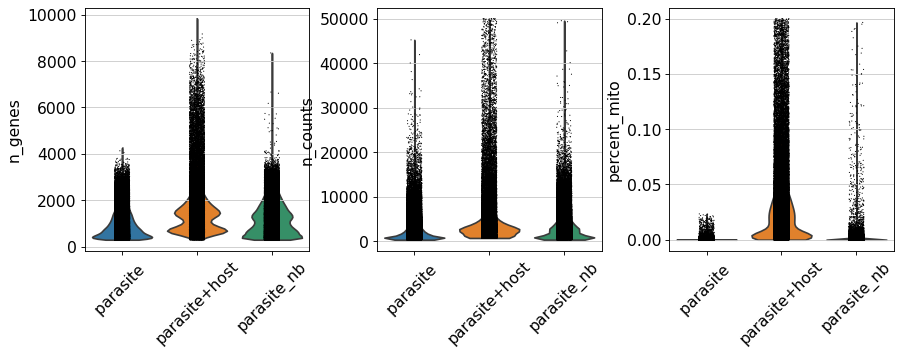

In [32]:
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=90, groupby='stage') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='proc') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='id') 

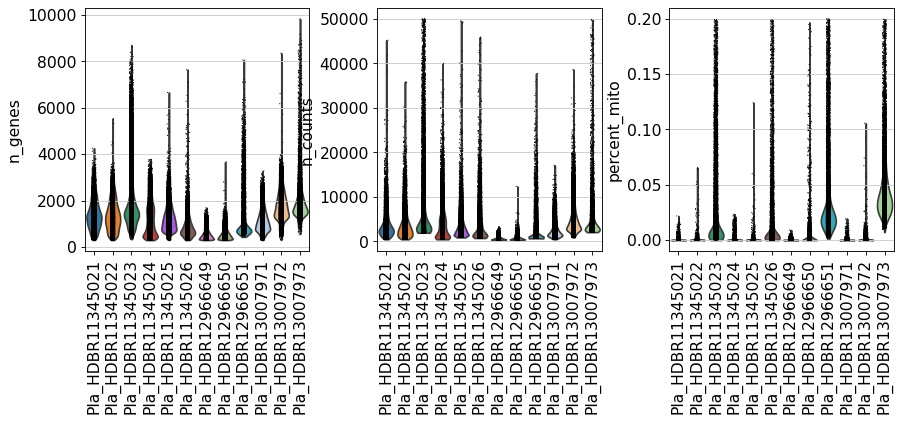

In [33]:
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=90, groupby='sample.1', save='_qc2.pdf') 

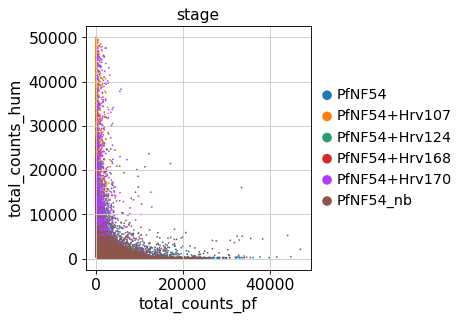

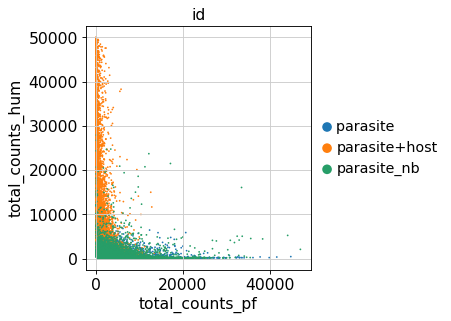

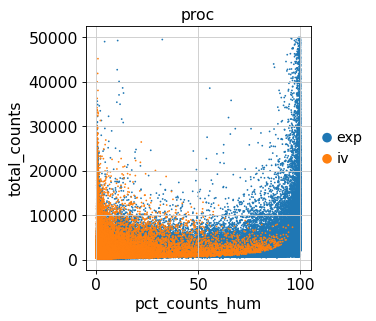

In [34]:
sc.pl.scatter(adata, x='total_counts_pf', y='total_counts_hum', color="stage", size=10) #save='_totalcounts.pdf')
sc.pl.scatter(adata, x='total_counts_pf', y='total_counts_hum', color="id",size=10)
sc.pl.scatter(adata, x='pct_counts_hum', y='total_counts', color="proc", size=10)

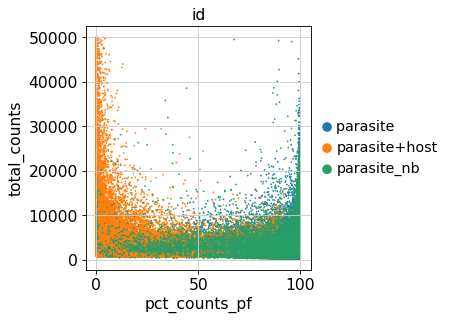

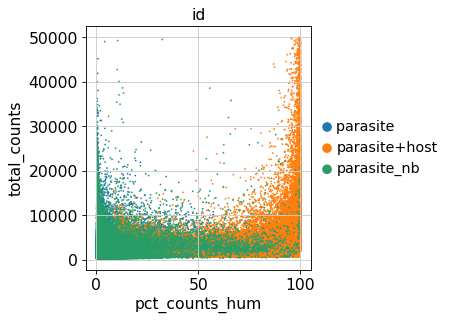

In [35]:
sc.pl.scatter(adata, x='pct_counts_pf', y='total_counts', color="id",sort_order=False, size=10,save='_id_1.pdf')
sc.pl.scatter(adata, x='pct_counts_hum', y='total_counts', color="id", size=10, save='_id_2.pdf')

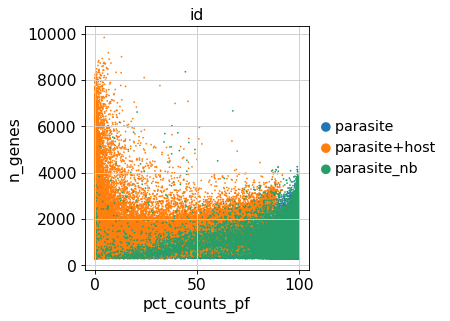

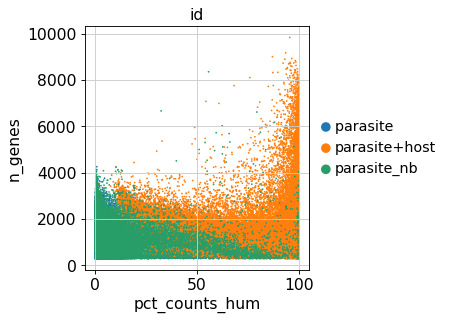

In [36]:
sc.pl.scatter(adata, x='pct_counts_pf', y='n_genes', color="id", size=10)
sc.pl.scatter(adata, x='pct_counts_hum', y='n_genes', color="id", size=10)

In [37]:
adata.obs.head()

sample   stage         id proc  \
Pla_HDBR11345021_AAACCCAAGCCTGACC  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGCGATGCA  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGCGTGCCT  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGCTGTGCC  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGGCACGAT  Pla_HDBR11345021  PfNF54  parasite    iv   

                                           sample.1   p_batch  percent_mito  \
Pla_HDBR11345021_AAACCCAAGCCTGACC  Pla_HDBR11345021  p_batch1      0.000000   
Pla_HDBR11345021_AAACCCAAGCGATGCA  Pla_HDBR11345021  p_batch1      0.001114   
Pla_HDBR11345021_AAACCCAAGCGTGCCT  Pla_HDBR11345021  p_batch1      0.000000   
Pla_HDBR11345021_AAACCCAAGCTGTGCC  Pla_HDBR11345021  p_batch1      0.000611   
Pla_HDBR11345021_AAACCCAAGGCACGAT  Pla_HDBR11345021  p_batch1      0.000000   

                                   n_counts  n_genes batch  n_genes_by_counts  \
Pla_HDBR11345021_AAACCCAAGCCTGACC    2506.0      793     0                793   
Pla_HDBR11345021_AAACCCAAGCGATGCA    2693.0     1372     0               1372   
Pla_HDBR11345021_AAACCCAAGCGTGCCT    2305.0     1296     0               1296   
Pla_HDBR11345021_AAACCCAAGCTGTGCC    4908.0     2127     0               2127   
Pla_HDBR11345021_AAACCCAAGGCACGAT    1668.0      962     0                962   

                                   total_counts  total_counts_hum  \
Pla_HDBR11345021_AAACCCAAGCCTGACC        2506.0              24.0   
Pla_HDBR11345021_AAACCCAAGCGATGCA        2693.0              21.0   
Pla_HDBR11345021_AAACCCAAGCGTGCCT        2305.0              40.0   
Pla_HDBR11345021_AAACCCAAGCTGTGCC        4908.0              34.0   
Pla_HDBR11345021_AAACCCAAGGCACGAT        1668.0              19.0   

                                   pct_counts_hum  total_counts_pf  \
Pla_HDBR11345021_AAACCCAAGCCTGACC        0.957702           2482.0   
Pla_HDBR11345021_AAACCCAAGCGATGCA        0.779799           2672.0   
Pla_HDBR11345021_AAACCCAAGCGTGCCT        1.735358           2265.0   
Pla_HDBR11345021_AAACCCAAGCTGTGCC        0.692747           4874.0   
Pla_HDBR11345021_AAACCCAAGGCACGAT        1.139089           1649.0   

                                   pct_counts_pf  
Pla_HDBR11345021_AAACCCAAGCCTGACC      99.042297  
Pla_HDBR11345021_AAACCCAAGCGATGCA      99.220200  
Pla_HDBR11345021_AAACCCAAGCGTGCCT      98.264641  
Pla_HDBR11345021_AAACCCAAGCTGTGCC      99.307251  
Pla_HDBR11345021_AAACCCAAGGCACGAT      98.860916

In [38]:
adata.obs.tail()

sample          stage  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  Pla_HDBR13007973  PfNF54+Hrv170   

                                              id proc          sample.1  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  parasite+host  exp  Pla_HDBR13007973   

                                    p_batch  percent_mito  n_counts  n_genes  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  p_batch7      0.021978    2911.0     1681   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  p_batch7      0.037967    3423.0     1766   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  p_batch7      0.039859    3688.0     1994   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  p_batch7      0.071372    2536.0     1656   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  p_batch7      0.036182    3206.0     1852   

                                  batch  n_genes_by_counts  total_counts  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG    11               1681        2911.0   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT    11               1766        3423.0   
Pla_HDBR13007973_TTTGTTGTCGCCAACG    11               1994        3688.0   
Pla_HDBR13007973_TTTGTTGTCTAGTACG    11               1656        2536.0   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA    11               1852        3206.0   

                                   total_counts_hum  pct_counts_hum  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG             580.0       19.924425   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT             979.0       28.600641   
Pla_HDBR13007973_TTTGTTGTCGCCAACG             966.0       26.193058   
Pla_HDBR13007973_TTTGTTGTCTAGTACG            1256.0       49.526814   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA             958.0       29.881472   

                                   total_counts_pf  pct_counts_pf  
Pla_HDBR13007973_TTTGTTGGTTTCGATG           2331.0      80.075577  
Pla_HDBR13007973_TTTGTTGTCCAGCTCT           2444.0      71.399353  
Pla_HDBR13007973_TTTGTTGTCGCCAACG           2722.0      73.806938  
Pla_HDBR13007973_TTTGTTGTCTAGTACG           1280.0      50.473183  
Pla_HDBR13007973_TTTGTTGTCTCGAGTA           2248.0      70.118530

In [39]:
pf= adata.var.gene_ids.str.startswith('PF3D7')
print(sum(pf))

5515


In [40]:
hum= adata.var.gene_ids.str.startswith('ENSG')
print(sum(hum))

27372


# Set cutoff of pct_counts mapping to human or pf genes per cell

In [41]:
# percentage in a droplet has mostly human genes
#sum(adata.obs.pct_counts_hum > 95)
sum(adata.obs.pct_counts_hum > 90)
#sum(adata.obs.pct_counts_hum > 80)

20133

In [42]:
sum(adata.obs.pct_counts_pf > 90)

233712

In [43]:
#Create a new metainfo for obs based on pct_counts mapping to hum or parasites
adata.obs['stage_0'] = 'pf'
#pf= adata.obs.pct_counts_pf > 80
#adata.obs.loc[pf, 'stage_0'] = 'pf_80'
hum= adata.obs.pct_counts_hum > 90
adata.obs.loc[hum, 'stage_0'] = 'hs_90'

Trying to set attribute `.obs` of view, copying.


In [44]:
adata.obs.tail()

sample          stage  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  Pla_HDBR13007973  PfNF54+Hrv170   

                                              id proc          sample.1  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  parasite+host  exp  Pla_HDBR13007973   

                                    p_batch  percent_mito  n_counts  n_genes  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  p_batch7      0.021978    2911.0     1681   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  p_batch7      0.037967    3423.0     1766   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  p_batch7      0.039859    3688.0     1994   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  p_batch7      0.071372    2536.0     1656   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  p_batch7      0.036182    3206.0     1852   

                                  batch  n_genes_by_counts  total_counts  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG    11               1681        2911.0   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT    11               1766        3423.0   
Pla_HDBR13007973_TTTGTTGTCGCCAACG    11               1994        3688.0   
Pla_HDBR13007973_TTTGTTGTCTAGTACG    11               1656        2536.0   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA    11               1852        3206.0   

                                   total_counts_hum  pct_counts_hum  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG             580.0       19.924425   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT             979.0       28.600641   
Pla_HDBR13007973_TTTGTTGTCGCCAACG             966.0       26.193058   
Pla_HDBR13007973_TTTGTTGTCTAGTACG            1256.0       49.526814   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA             958.0       29.881472   

                                   total_counts_pf  pct_counts_pf stage_0  
Pla_HDBR13007973_TTTGTTGGTTTCGATG           2331.0      80.075577      pf  
Pla_HDBR13007973_TTTGTTGTCCAGCTCT           2444.0      71.399353      pf  
Pla_HDBR13007973_TTTGTTGTCGCCAACG           2722.0      73.806938      pf  
Pla_HDBR13007973_TTTGTTGTCTAGTACG           1280.0      50.473183      pf  
Pla_HDBR13007973_TTTGTTGTCTCGAGTA           2248.0      70.118530      pf

In [45]:
meta

stage             id proc          sample.1  \
sample                                                                  
Pla_HDBR11345021         PfNF54      parasite    iv  Pla_HDBR11345021   
Pla_HDBR11345022      PfNF54_nb    parasite_nb  exp  Pla_HDBR11345022   
Pla_HDBR11345023  PfNF54+Hrv107  parasite+host  exp  Pla_HDBR11345023   
Pla_HDBR11345024         PfNF54      parasite    iv  Pla_HDBR11345024   
Pla_HDBR11345025      PfNF54_nb    parasite_nb  exp  Pla_HDBR11345025   
Pla_HDBR11345026  PfNF54+Hrv124  parasite+host  exp  Pla_HDBR11345026   
Pla_HDBR12966649         PfNF54      parasite    iv  Pla_HDBR12966649   
Pla_HDBR12966650      PfNF54_nb    parasite_nb  exp  Pla_HDBR12966650   
Pla_HDBR12966651  PfNF54+Hrv168  parasite+host  exp  Pla_HDBR12966651   
Pla_HDBR13007971         PfNF54      parasite    iv  Pla_HDBR13007971   
Pla_HDBR13007972      PfNF54_nb    parasite_nb  exp  Pla_HDBR13007972   
Pla_HDBR13007973  PfNF54+Hrv170  parasite+host  exp  Pla_HDBR13007973   

                   p_batch  
sample                      
Pla_HDBR11345021  p_batch1  
Pla_HDBR11345022  p_batch1  
Pla_HDBR11345023  p_batch1  
Pla_HDBR11345024  p_batch2  
Pla_HDBR11345025  p_batch2  
Pla_HDBR11345026  p_batch2  
Pla_HDBR12966649  p_batch6  
Pla_HDBR12966650  p_batch6  
Pla_HDBR12966651  p_batch6  
Pla_HDBR13007971  p_batch7  
Pla_HDBR13007972  p_batch7  
Pla_HDBR13007973  p_batch7

In [46]:
#Create a new metainfo for obs based on vars to spilt 'pf' category in stage_0 to 'pf_iv', 'pf_nb', 'pf_b'
def stage_1(adata_obj, cell_id):
    
    curr_proc = adata_obj.obs.loc[cell_id, 'proc']
    curr_id = adata_obj.obs.loc[cell_id, 'id']
    curr_stage_0 = adata_obj.obs.loc[cell_id, 'stage_0']
    
    if curr_stage_0 == 'pf':
        if curr_proc == 'iv':
            return('pf_iv')
        
    if curr_stage_0 == 'pf':
        if curr_id == 'parasite+host':
            return('pf_b')
        
    if curr_stage_0 == 'pf':
        if curr_id == 'parasite_nb':
            return('pf_nb')
        
    if curr_stage_0 == 'hs_90':
            return('hs')

In [47]:
adata.obs['sample_barcode'] = adata.obs_names

In [48]:
adata

AnnData object with n_obs × n_vars = 311414 × 32887
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'stage_colors', 'id_colors', 'proc_colors', 'sample.1_colors'

In [49]:
%%time

adata.obs['stage_1'] =  adata.obs['sample_barcode'].apply(lambda x: stage_1(adata,x))

CPU times: user 12.2 s, sys: 0 ns, total: 12.2 s
Wall time: 12.2 s


In [50]:
#Check
adata.obs.head()

sample   stage         id proc  \
Pla_HDBR11345021_AAACCCAAGCCTGACC  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGCGATGCA  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGCGTGCCT  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGCTGTGCC  Pla_HDBR11345021  PfNF54  parasite    iv   
Pla_HDBR11345021_AAACCCAAGGCACGAT  Pla_HDBR11345021  PfNF54  parasite    iv   

                                           sample.1   p_batch  percent_mito  \
Pla_HDBR11345021_AAACCCAAGCCTGACC  Pla_HDBR11345021  p_batch1      0.000000   
Pla_HDBR11345021_AAACCCAAGCGATGCA  Pla_HDBR11345021  p_batch1      0.001114   
Pla_HDBR11345021_AAACCCAAGCGTGCCT  Pla_HDBR11345021  p_batch1      0.000000   
Pla_HDBR11345021_AAACCCAAGCTGTGCC  Pla_HDBR11345021  p_batch1      0.000611   
Pla_HDBR11345021_AAACCCAAGGCACGAT  Pla_HDBR11345021  p_batch1      0.000000   

                                   n_counts  n_genes batch  n_genes_by_counts  \
Pla_HDBR11345021_AAACCCAAGCCTGACC    2506.0      793     0                793   
Pla_HDBR11345021_AAACCCAAGCGATGCA    2693.0     1372     0               1372   
Pla_HDBR11345021_AAACCCAAGCGTGCCT    2305.0     1296     0               1296   
Pla_HDBR11345021_AAACCCAAGCTGTGCC    4908.0     2127     0               2127   
Pla_HDBR11345021_AAACCCAAGGCACGAT    1668.0      962     0                962   

                                   total_counts  total_counts_hum  \
Pla_HDBR11345021_AAACCCAAGCCTGACC        2506.0              24.0   
Pla_HDBR11345021_AAACCCAAGCGATGCA        2693.0              21.0   
Pla_HDBR11345021_AAACCCAAGCGTGCCT        2305.0              40.0   
Pla_HDBR11345021_AAACCCAAGCTGTGCC        4908.0              34.0   
Pla_HDBR11345021_AAACCCAAGGCACGAT        1668.0              19.0   

                                   pct_counts_hum  total_counts_pf  \
Pla_HDBR11345021_AAACCCAAGCCTGACC        0.957702           2482.0   
Pla_HDBR11345021_AAACCCAAGCGATGCA        0.779799           2672.0   
Pla_HDBR11345021_AAACCCAAGCGTGCCT        1.735358           2265.0   
Pla_HDBR11345021_AAACCCAAGCTGTGCC        0.692747           4874.0   
Pla_HDBR11345021_AAACCCAAGGCACGAT        1.139089           1649.0   

                                   pct_counts_pf stage_0  \
Pla_HDBR11345021_AAACCCAAGCCTGACC      99.042297      pf   
Pla_HDBR11345021_AAACCCAAGCGATGCA      99.220200      pf   
Pla_HDBR11345021_AAACCCAAGCGTGCCT      98.264641      pf   
Pla_HDBR11345021_AAACCCAAGCTGTGCC      99.307251      pf   
Pla_HDBR11345021_AAACCCAAGGCACGAT      98.860916      pf   

                                                      sample_barcode stage_1  
Pla_HDBR11345021_AAACCCAAGCCTGACC  Pla_HDBR11345021_AAACCCAAGCCTGACC   pf_iv  
Pla_HDBR11345021_AAACCCAAGCGATGCA  Pla_HDBR11345021_AAACCCAAGCGATGCA   pf_iv  
Pla_HDBR11345021_AAACCCAAGCGTGCCT  Pla_HDBR11345021_AAACCCAAGCGTGCCT   pf_iv  
Pla_HDBR11345021_AAACCCAAGCTGTGCC  Pla_HDBR11345021_AAACCCAAGCTGTGCC   pf_iv  
Pla_HDBR11345021_AAACCCAAGGCACGAT  Pla_HDBR11345021_AAACCCAAGGCACGAT   pf_iv

In [51]:
#Check
adata.obs.tail()

sample          stage  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  Pla_HDBR13007973  PfNF54+Hrv170   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  Pla_HDBR13007973  PfNF54+Hrv170   

                                              id proc          sample.1  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  parasite+host  exp  Pla_HDBR13007973   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  parasite+host  exp  Pla_HDBR13007973   

                                    p_batch  percent_mito  n_counts  n_genes  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG  p_batch7      0.021978    2911.0     1681   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  p_batch7      0.037967    3423.0     1766   
Pla_HDBR13007973_TTTGTTGTCGCCAACG  p_batch7      0.039859    3688.0     1994   
Pla_HDBR13007973_TTTGTTGTCTAGTACG  p_batch7      0.071372    2536.0     1656   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  p_batch7      0.036182    3206.0     1852   

                                  batch  n_genes_by_counts  total_counts  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG    11               1681        2911.0   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT    11               1766        3423.0   
Pla_HDBR13007973_TTTGTTGTCGCCAACG    11               1994        3688.0   
Pla_HDBR13007973_TTTGTTGTCTAGTACG    11               1656        2536.0   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA    11               1852        3206.0   

                                   total_counts_hum  pct_counts_hum  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG             580.0       19.924425   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT             979.0       28.600641   
Pla_HDBR13007973_TTTGTTGTCGCCAACG             966.0       26.193058   
Pla_HDBR13007973_TTTGTTGTCTAGTACG            1256.0       49.526814   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA             958.0       29.881472   

                                   total_counts_pf  pct_counts_pf stage_0  \
Pla_HDBR13007973_TTTGTTGGTTTCGATG           2331.0      80.075577      pf   
Pla_HDBR13007973_TTTGTTGTCCAGCTCT           2444.0      71.399353      pf   
Pla_HDBR13007973_TTTGTTGTCGCCAACG           2722.0      73.806938      pf   
Pla_HDBR13007973_TTTGTTGTCTAGTACG           1280.0      50.473183      pf   
Pla_HDBR13007973_TTTGTTGTCTCGAGTA           2248.0      70.118530      pf   

                                                      sample_barcode stage_1  
Pla_HDBR13007973_TTTGTTGGTTTCGATG  Pla_HDBR13007973_TTTGTTGGTTTCGATG    pf_b  
Pla_HDBR13007973_TTTGTTGTCCAGCTCT  Pla_HDBR13007973_TTTGTTGTCCAGCTCT    pf_b  
Pla_HDBR13007973_TTTGTTGTCGCCAACG  Pla_HDBR13007973_TTTGTTGTCGCCAACG    pf_b  
Pla_HDBR13007973_TTTGTTGTCTAGTACG  Pla_HDBR13007973_TTTGTTGTCTAGTACG    pf_b  
Pla_HDBR13007973_TTTGTTGTCTCGAGTA  Pla_HDBR13007973_TTTGTTGTCTCGAGTA    pf_b

... storing 'stage_0' as categorical
... storing 'stage_1' as categorical


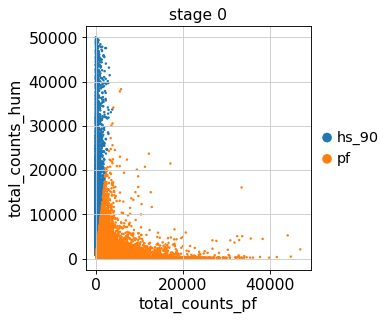

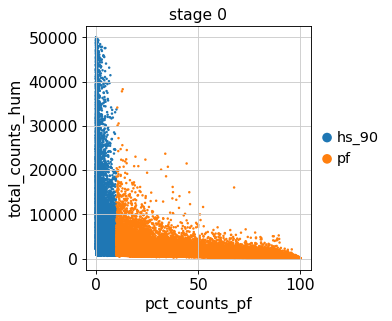

In [52]:
sc.pl.scatter(adata, x='total_counts_pf', y='total_counts_hum', color="stage_0", size=20)
sc.pl.scatter(adata, x='pct_counts_pf', y='total_counts_hum', color="stage_0", size=20)

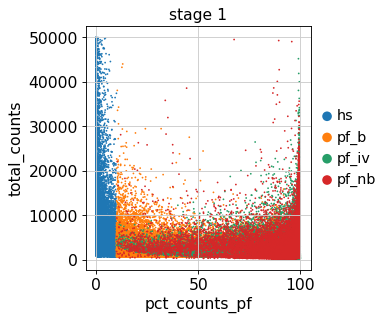

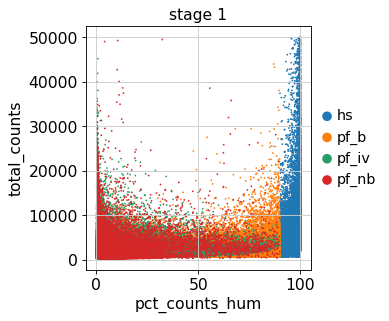

In [53]:
sc.pl.scatter(adata, x='pct_counts_pf', y='total_counts', color="stage_1", size=10,save='_id_3.pdf')
sc.pl.scatter(adata, x='pct_counts_hum', y='total_counts', color="stage_1", size=10, save='_id_4.pdf')

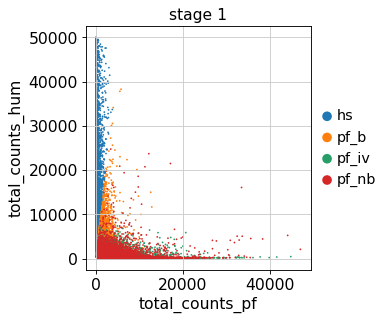

In [58]:
sc.pl.scatter(adata, x='total_counts_pf', y='total_counts_hum', color="stage_1", size=10)

In [59]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['stage_1'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                  
hs           20133  0.064650
pf_b         47892  0.153789
pf_iv       112397  0.360925
pf_nb       130992  0.420636

In [60]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['sample.1'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                        
Pla_HDBR11345021   22176  0.071211
Pla_HDBR11345022   22355  0.071785
Pla_HDBR11345023   19107  0.061356
Pla_HDBR11345024   18730  0.060145
Pla_HDBR11345025   34842  0.111883
Pla_HDBR11345026   15485  0.049725
Pla_HDBR12966649   37723  0.121135
Pla_HDBR12966650   37842  0.121517
Pla_HDBR12966651   14151  0.045441
Pla_HDBR13007971   33786  0.108492
Pla_HDBR13007972   36130  0.116019
Pla_HDBR13007973   19087  0.061291

In [61]:
adata_subset = adata[adata.obs['stage_1'] == 'pf_b']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [62]:
print('Total number of cells: {:d}'.format(adata_subset.n_obs))
print('Total number of genes: {:d}'.format(adata_subset.n_vars))
adata_subset.obs['sample.1'].values.describe()

Total number of cells: 47892
Total number of genes: 32887


counts     freqs
categories                        
Pla_HDBR11345023    8143  0.170028
Pla_HDBR11345026   11807  0.246534
Pla_HDBR12966651   10137  0.211664
Pla_HDBR13007973   17805  0.371774

## Calculate cell-cycle scores AND (optional)regress out cell cycle genes

We here perform cell cycle scoring. To score a gene list, the algorithm calculates the difference of mean expression of the given list and the mean expression of reference genes. To build the reference, the function randomly chooses a bunch of genes matching the distribution of the expression of the given list. Cell cycle scoring adds three slots in data, a score for S phase, a score for G2M phase and the predicted cell cycle phase.

First read the file with cell cycle genes, from Regev lab and split into S and G2M phase genes. Cell cycle genes were retrieved from the scanpy_usage github site via web browser at RegevLab Github repo.

In [63]:
# Regress out cell cycle genes
data_dir='/nfs/team292/rh26/09_2D9parasite_stars/'
cell_cycle_genes = [x.strip() for x in open(data_dir+'regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
s_genes = [x for x in s_genes if x in adata.var_names]
g2m_genes = [x for x in g2m_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
# sc.pp.regress_out(adata, ['S_score', 'G2M_score']

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [64]:
adata

AnnData object with n_obs × n_vars = 311414 × 32887
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'stage_colors', 'id_colors', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors'

## Load scrublet

In [65]:
scorenames = ['scrublet_score','scrublet_cluster_score','zscore','bh_pval','bonf_pval']

scrdf = []
for sample in meta.index:
    scrdf.append(pd.read_csv(data_dir+ 'star-scrublet-scores/'+sample+'.csv', header=0, index_col=0))
scrdf = pd.concat(scrdf)
scrdf.index = [i.replace('-1', '') for i in scrdf.index]
for score in scorenames:
    adata.obs[score] = scrdf[score]
adata.obs['is_doublet'] = adata.obs['bonf_pval'] < 0.01
adata.obs['is_doublet_0.05'] = adata.obs['bonf_pval'] < 0.05

In [68]:
# adding the raw counts
adata.layers['raw_counts']=adata.X

# Save raw counts

In [1]:
# adding the raw counts
adata.X=adata.layers['raw_counts']
#adata.raw = adata.copy
adata.write('./output/rna1_counts_Pf_adata.h5ad')

NameError: name 'adata' is not defined

======================================================================================================================================

## Normalize per cell, log transform and DIM reduction OPTIONAL

After removing unwanted cells and genes from the dataset, the next step is to normalize the data. By default, we employ a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result.

In [71]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


### PCA
**1. Filter HVGs in bdata and do PCA with them**

In [72]:
# Filter HVGs
bdata = adata.copy()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
for col in ['highly_variable','means', 'dispersions', 'dispersions_norm']:
    adata.var[col] = bdata.var[col]
bdata = bdata[:, bdata.var['highly_variable']]
print('Total number of cells: {:d}'.format(bdata.n_obs))
print('Total number of genes: {:d}'.format(bdata.n_vars))

sc.pp.scale(bdata, max_value=10)
sc.tl.pca(bdata, svd_solver='arpack', n_comps=50)

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Total number of cells: 311414
Total number of genes: 3454


**2. Transfer PCA to the main adata**

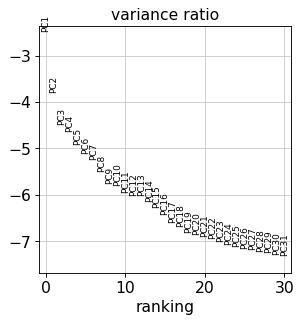

In [73]:
#fill NaNs with False so that subsetting to HVGs is possible
adata.var['highly_variable'].fillna(value=False, inplace=True)
adata.obsm['X_pca'] = bdata.obsm['X_pca'].copy()
adata.uns['pca'] = bdata.uns['pca'].copy()
adata.varm['PCs'] = np.zeros(shape=(adata.n_vars, 50))
adata.varm['PCs'][adata.var['highly_variable']] = bdata.varm['PCs']
sc.pl.pca_variance_ratio(adata, log=True, save='.pdf')

## UMAP

In [75]:
#n_pcs = 40 exp
#n_pcs = 20 rest
n_pcs = 40
sc.pp.neighbors(adata, n_pcs = n_pcs)
sc.tl.umap(adata)

In [76]:
palette1=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

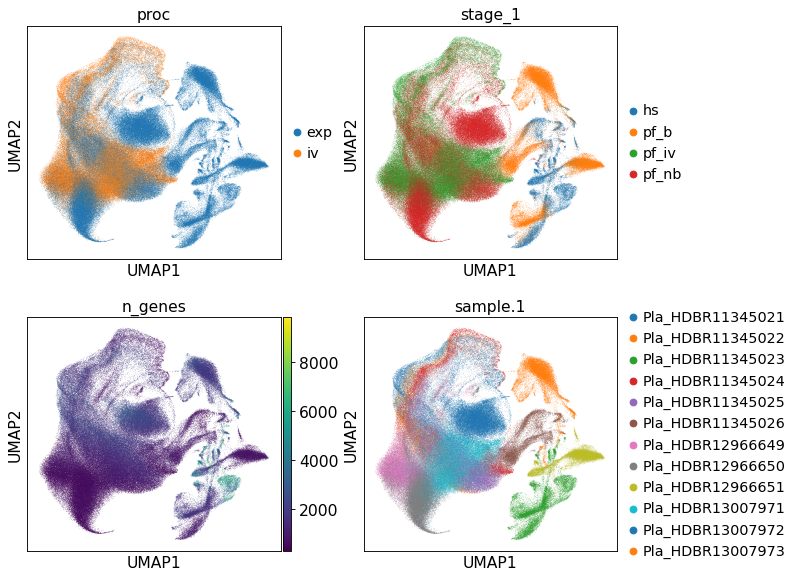

In [77]:
sc.pl.umap(adata, color=['proc','stage_1', 'n_genes', 'sample.1'],palette= palette1, ncols = 2, save='_preprocessing.pdf')

In [78]:
adata.obs['is_doublet'].value_counts()

False    308453
True       2961
Name: is_doublet, dtype: int64

In [79]:
adata.obs['is_doublet_0.05'].value_counts()

False    308057
True       3357
Name: is_doublet_0.05, dtype: int64

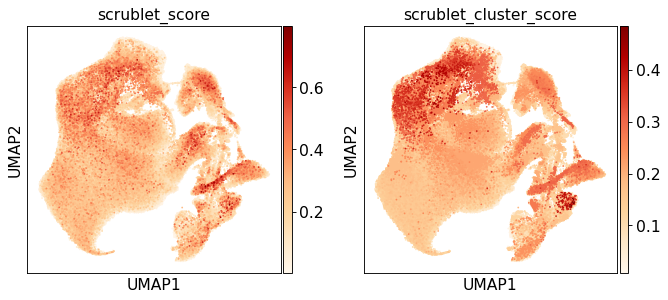

In [80]:
sc.pl.umap(adata, color=['scrublet_score', 'scrublet_cluster_score'],size=10, color_map='OrRd', save='_scrublet_addi.pdf')

In [81]:
np.unique(adata.obs['stage_1'], return_counts=True)

(array(['hs', 'pf_b', 'pf_iv', 'pf_nb'], dtype=object),
 array([ 20133,  47892, 112397, 130992]))

In [82]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['sample.1'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                        
Pla_HDBR11345021   22176  0.071211
Pla_HDBR11345022   22355  0.071785
Pla_HDBR11345023   19107  0.061356
Pla_HDBR11345024   18730  0.060145
Pla_HDBR11345025   34842  0.111883
Pla_HDBR11345026   15485  0.049725
Pla_HDBR12966649   37723  0.121135
Pla_HDBR12966650   37842  0.121517
Pla_HDBR12966651   14151  0.045441
Pla_HDBR13007971   33786  0.108492
Pla_HDBR13007972   36130  0.116019
Pla_HDBR13007973   19087  0.061291

In [83]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['proc'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                  
exp         198999  0.639018
iv          112415  0.360982

In [84]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['stage_1'].values.describe()

Total number of cells: 311414
Total number of genes: 32887


counts     freqs
categories                  
hs           20133  0.064650
pf_b         47892  0.153789
pf_iv       112397  0.360925
pf_nb       130992  0.420636

## Visualize some general markers

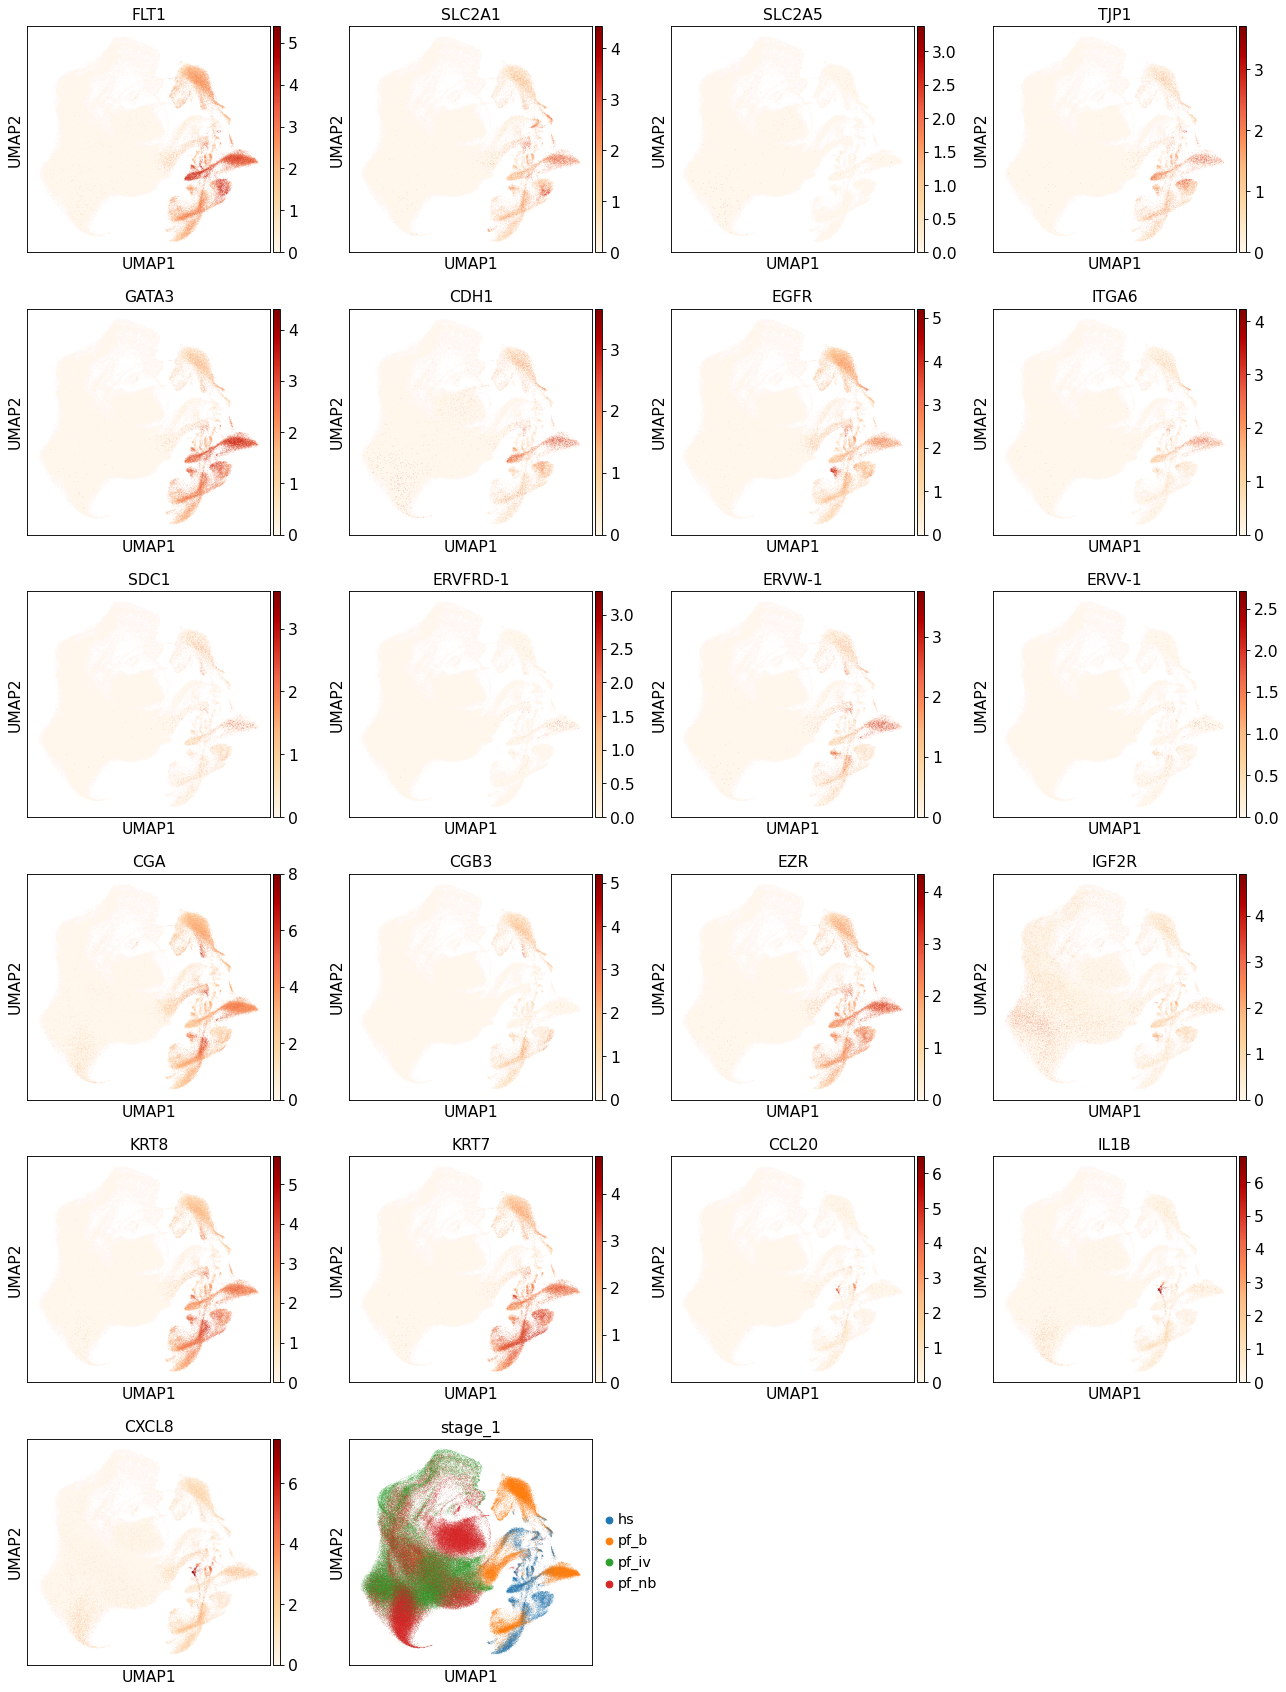

In [88]:
sc.pl.umap(adata, color=[ 'FLT1', 'SLC2A1', 'SLC2A5', 'TJP1','GATA3','CDH1','EGFR','ITGA6','SDC1', 'ERVFRD-1','ERVW-1', 'ERVV-1', 'CGA',
                         'CGB3' ,'EZR', 'IGF2R', 'KRT8','KRT7', 'CCL20', 'IL1B',
                         'CXCL8', 'stage_1'],color_map='OrRd', use_raw=False) 

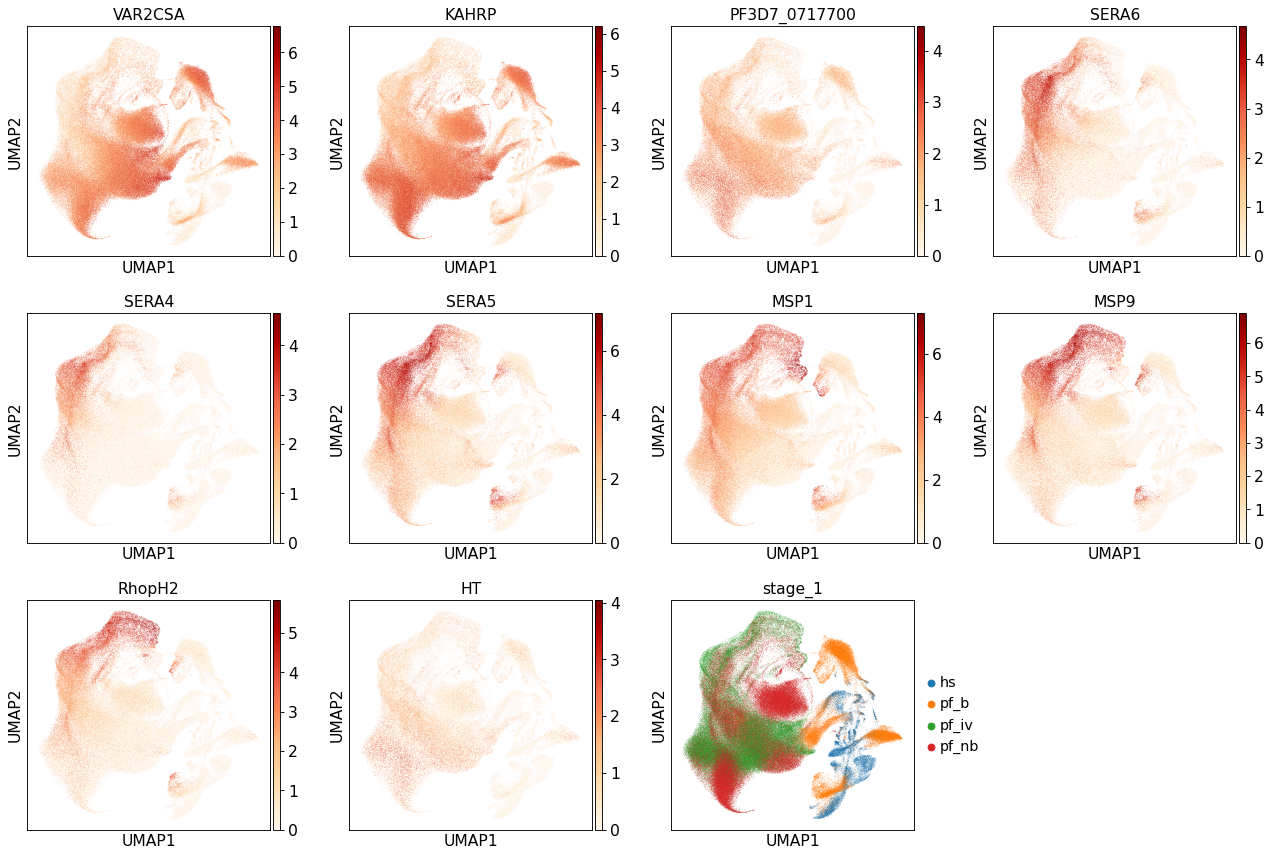

In [90]:
sc.pl.umap(adata, color=['VAR2CSA','KAHRP','PF3D7_0717700', 'SERA6', 'SERA4','SERA5','MSP1','MSP9', 'RhopH2', 'HT','stage_1'],ncols=4, 
           color_map='OrRd')
#PF3D7_0204700: hexose transporter